<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## Initial Checks

In [ ]:
!conda list | grep "pytorch"

ffmpeg                    4.3                  hf484d3e_0    pytorch
libjpeg-turbo             2.0.0                h9bf148f_0    pytorch
pytorch                   2.0.1           py3.11_cuda11.8_cudnn8.7.0_0    pytorch
pytorch-cuda              11.8                 h7e8668a_5    pytorch
pytorch-ignite            0.4.12                   pypi_0    pypi
pytorch-lightning         2.0.7                    pypi_0    pypi
pytorch-mutex             1.0                        cuda    pytorch
torchaudio                2.0.2               py311_cu118    pytorch
torchtriton               2.0.0                     py311    pytorch
torchvision               0.15.2              py311_cu118    pytorch


In [ ]:
!pip list | grep "fastai" 
!pip list | grep "fastbook"
!pip list | grep "ipywidgets"
!pip list | grep "fastAIcourse"

fastai                        2.7.12
fastbook                      0.0.28
ipywidgets                    8.0.4


In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

## Gather Data

In [ ]:
from fastbook import search_images_ddg
from fastdownload import download_url
from fastai.vision.all import *
import os

In [ ]:
from nbdevAuto.functions import *

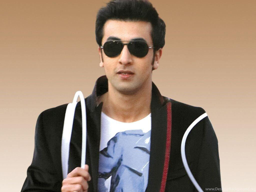

In [ ]:
download_pic('indian actor close up',
             name = 'indian', 
             folder = './Data/actors_test', 
             n_images = 10)

In [ ]:
read_from_file??

Signature: read_from_file(file_path)
Docstring: <no docstring>
Source:   
def read_from_file(file_path):
    from fastbook import search_images_ddg
    from fastdownload import download_url
    import os
    import shutil
    from PIL import Image
    countries = ()
    with open(file_path, 'r') as file:
        for line in file:
            # Remove any leading/trailing whitespace and newline characters
            country = line.strip()
            # Add the country to the tuple
            countries += (country,)

    return countries
File:      ~/mambaforge/envs/cfast/lib/python3.11/site-packages/nbdevAuto/functions.py
Type:      function

In [ ]:
#|code-fold: true
searches = ('Indian', 'Chinese', 'American', 'Nigerian', 'Pakistani', 'Japanese')
path = Path('Data/actors')

create_data_folder(folder_path = path,
                   searches = searches,
                   before = 'Famous ',
                   after = ' actor close up',
                   amount = 400,
                   recreate = False
                  )

created Indian folder
created Chinese folder
created American folder
created Nigerian folder
created Pakistani folder
created Japanese folder
Error with 400 images of Famous Indian actor close up: 'next'
Error with 380 images of Famous Indian actor close up: 'next'
downloading 360 images for:Famous Indian actor close up
Error with 400 images of Famous Chinese actor close up: 'next'
Error with 380 images of Famous Chinese actor close up: 'next'
downloading 360 images for:Famous Chinese actor close up
Error with 400 images of Famous American actor close up: 'next'
Error with 380 images of Famous American actor close up: 'next'
downloading 360 images for:Famous American actor close up
Error with 400 images of Famous Nigerian actor close up: 'next'
downloading 380 images for:Famous Nigerian actor close up
Error with 400 images of Famous Pakistani actor close up: 'next'
Error with 380 images of Famous Pakistani actor close up: 'next'
downloading 360 images for:Famous Pakistani actor close u

## Design Model

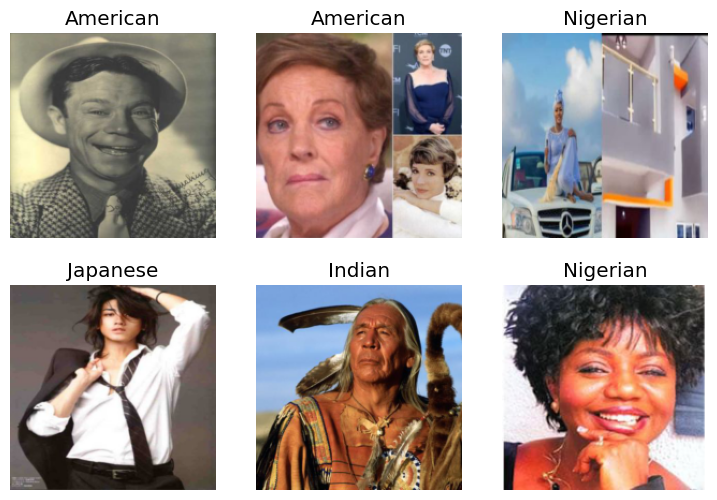

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

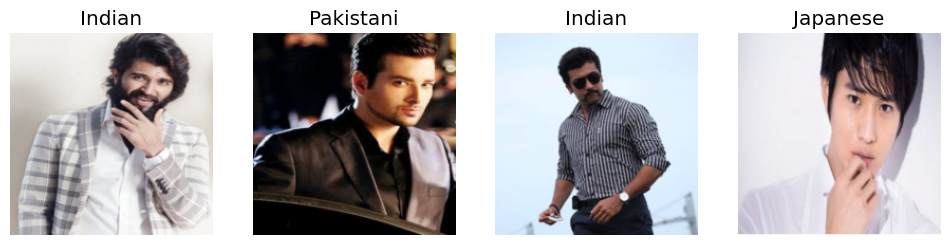

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

/home/ben/mambaforge/envs/cfast/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ben/mambaforge/envs/cfast/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,2.531562,1.645555,0.533011,00:51


epoch,train_loss,valid_loss,error_rate,time
0,1.552908,1.435370,0.476651,00:08
1,1.172976,1.425597,0.462158,00:07
2,0.828362,1.448297,0.420290,00:07
3,0.590487,1.448689,0.425121,00:07
4,0.427939,1.446647,0.425121,00:07


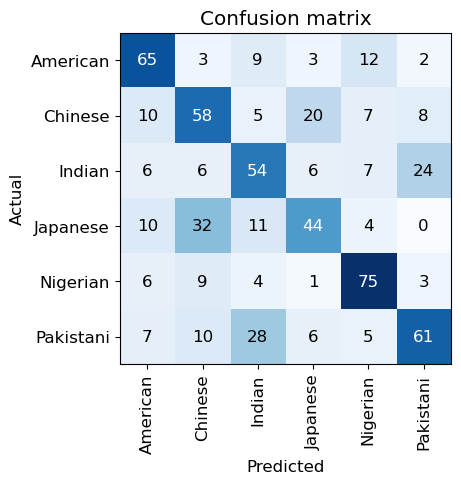

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

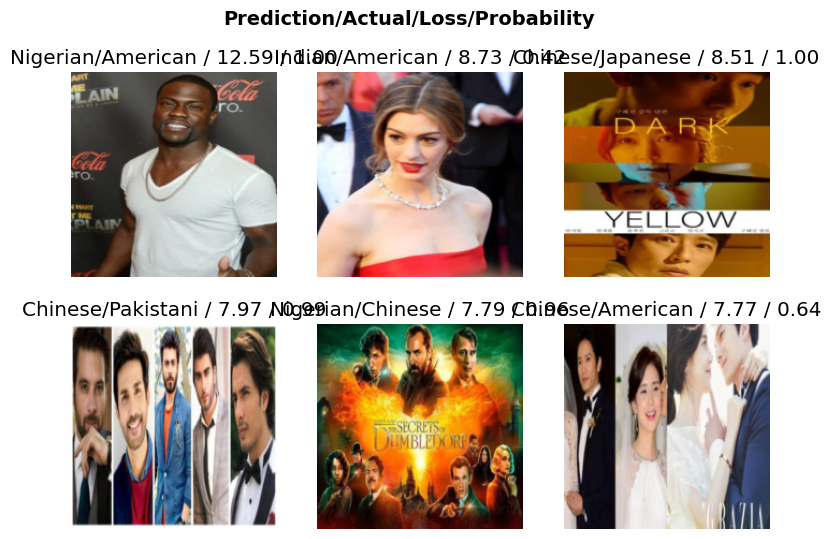

In [ ]:
interp.plot_top_losses(6, nrows=2)

## Testing

{'American': 0.29763, 'Chinese': 0.07823, 'Indian': 98.55846, 'Japanese': 0.02067, 'Nigerian': 0.00509, 'Pakistani': 1.03991}


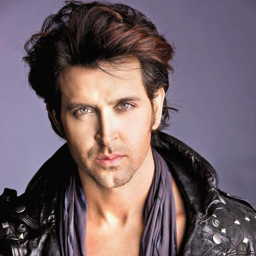

In [ ]:
image= f'./Data/actors_test/indian{8}.jpg'

print(classify_images(learn, image))
Image.open(image).to_thumb(256,256)

## New models

In [ ]:
!pip list | grep 'timm'

timm                          0.9.5


In [ ]:
import timm

In [ ]:
timm.list_models('convnext*')[0:5]

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols']

In [ ]:
timm.list_models('resnet1*')[0:5]

['resnet10t', 'resnet14t', 'resnet18', 'resnet18d', 'resnet101']

In [ ]:
learn1 = vision_learner(dls, 'resnet26', metrics=error_rate).to_fp16()
learn1.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.312677,1.824935,0.495974,00:07


epoch,train_loss,valid_loss,error_rate,time
0,1.092882,1.420130,0.436393,00:07
1,0.892234,1.551688,0.444444,00:07
2,0.667233,1.496551,0.433172,00:07
3,0.505152,1.428328,0.434783,00:07
4,0.393912,1.432097,0.428341,00:07


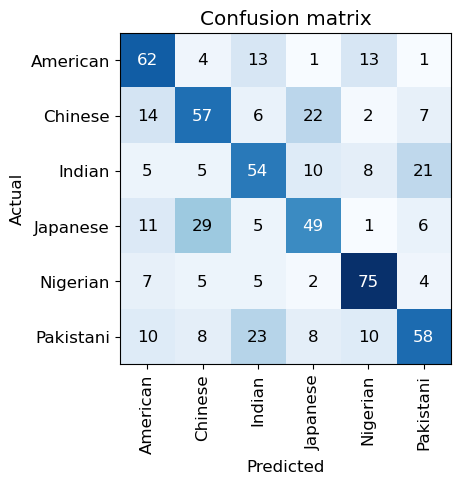

In [ ]:
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()

{'American': 1.93272, 'Chinese': 0.29763, 'Indian': 94.33807, 'Japanese': 0.74532, 'Nigerian': 0.12889, 'Pakistani': 2.55736}


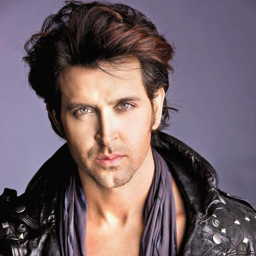

In [ ]:
#|eval: false
print(classify_images(learn1, image))
Image.open(image).to_thumb(256,256)

In [ ]:
#|eval: false
learn2 = vision_learner(dls, 'resnetv2_50', metrics=error_rate).to_fp16()
learn2.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.409034,1.555330,0.563607,00:08


epoch,train_loss,valid_loss,error_rate,time
0,1.257049,1.527638,0.534622,00:17
1,1.107014,1.643291,0.481481,00:18
2,0.895890,1.621696,0.471820,00:18
3,0.723650,1.563223,0.473430,00:18
4,0.597290,1.563260,0.470209,00:18


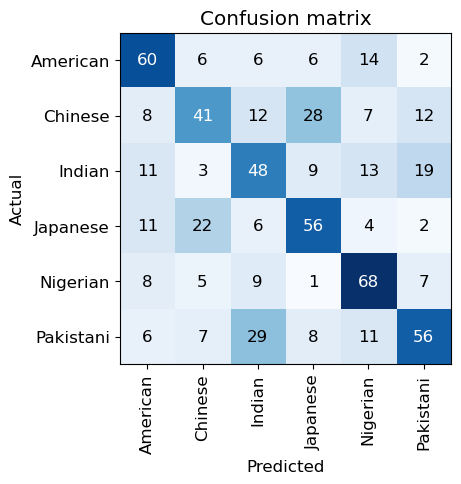

In [ ]:
#|eval: false
interp = ClassificationInterpretation.from_learner(learn2)
interp.plot_confusion_matrix()

{'American': 0.3549, 'Chinese': 0.33474, 'Indian': 93.41635, 'Japanese': 5.27019, 'Nigerian': 0.00385, 'Pakistani': 0.61998}


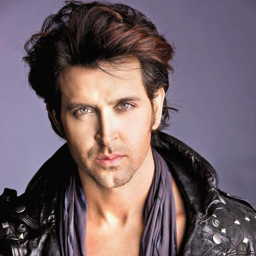

In [ ]:
#|eval: false
print(classify_images(learn2, image))
Image.open(image).to_thumb(256,256)

In [ ]:
#|eval: false
learn3 = vision_learner(dls, 'convnextv2_tiny', metrics=error_rate).to_fp16()
learn3.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.345684,1.306399,0.450886,02:10
1,1.648355,1.032094,0.365539,02:14
2,1.210625,0.989129,0.338164,02:16
3,0.911790,0.994874,0.341385,02:13
4,0.740028,0.988997,0.334944,02:26


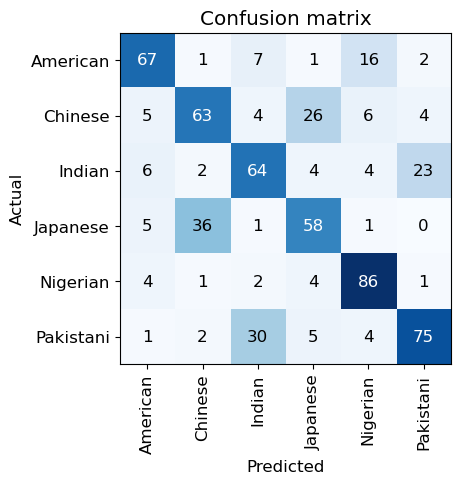

In [ ]:
#|eval: false
interp = ClassificationInterpretation.from_learner(learn3)
interp.plot_confusion_matrix()

{'American': 1.42206, 'Chinese': 0.01462, 'Indian': 91.9322, 'Japanese': 1.72204, 'Nigerian': 0.01778, 'Pakistani': 4.8913}


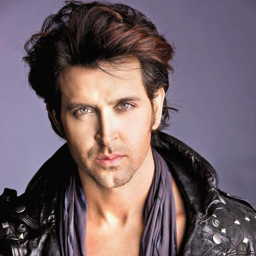

In [ ]:
#|eval: false
print(classify_images(learn3, image))
Image.open(image).to_thumb(256,256)

In [ ]:
#|eval: false
m = learn3.model
m

Sequential(
  (0): TimmBody(
    (model): ConvNeXt(
      (stem): Sequential(
        (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
      )
      (stages): Sequential(
        (0): ConvNeXtStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (norm): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
              (mlp): GlobalResponseNormMlp(
                (fc1): Linear(in_features=96, out_features=384, bias=True)
                (act): GELU()
                (drop1): Dropout(p=0.0, inplace=False)
                (grn): GlobalResponseNorm()
                (fc2): Linear(in_features=384, out_features=96, bias=True)
                (drop2): Dropout(p=0.0, inplace=False)
              )
              (shortcut): Identity()
              (drop_p

In [ ]:
#|eval: false
l = m.get_submodule('0.model.stem.1')
list(l.parameters())

[Parameter containing:
 tensor([ 4.9317e+00, -1.9534e-03,  1.1269e+00,  3.4428e-01,  2.0585e-01,  4.7114e-01, -1.5931e-02,  1.9189e+00,  3.0262e+00,  1.5578e+00,  5.8386e-01, -2.5743e-03,  3.3899e+00,  1.2300e+00,
         -7.5090e-03,  2.1205e+00,  1.7195e+00,  7.8101e-01,  2.3211e+00,  3.1620e+00,  1.6729e+00,  1.3192e+00,  3.6899e-01,  2.2085e+00,  1.8041e-01,  1.5685e-01,  1.8197e+00, -7.1151e-03,
          2.3748e+00,  3.6727e+00,  3.9811e-01,  2.5017e-02,  3.6421e-01,  1.1991e+00,  7.3035e-01,  2.8002e-01,  2.4208e+00,  3.0896e-01,  7.0029e-01,  6.3881e-01,  7.9266e-01,  2.5648e-03,
          2.7810e-01,  5.4637e-01,  8.0494e-01,  3.3132e-01,  7.9945e-01,  5.9783e-01,  1.9429e-01,  3.4769e-01,  2.2478e+00,  7.3358e-04,  1.1625e+00,  2.1141e-03,  3.2332e+00,  5.9113e-01,
          2.1750e-01,  4.1986e+00,  2.9994e-01,  8.3881e-01, -5.9712e-03,  8.3365e-03,  6.7004e-01,  2.3832e-01,  1.2561e+00,  2.7700e-01,  6.5003e-01,  2.4996e-01,  4.6959e+00,  6.5632e-01,
          1.1964e-02, 